In [121]:
# Pandas is a library for basic data analysis
import pandas as pd

# NumPy is a library for advanced mathematical computation
import numpy as np

# MatPlotLib is a library for basic data visualization
import matplotlib.pyplot as plt

# SeaBorn is a library for advanced data visualization
import seaborn as sns

In [122]:
FILEPATH = '../Summer-Olympic-medals-1976-to-2008.csv'
df = pd.read_csv(FILEPATH, encoding= 'unicode_escape')
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


## Question 1: Which country had the highest number of medals from 1976 - 2008?

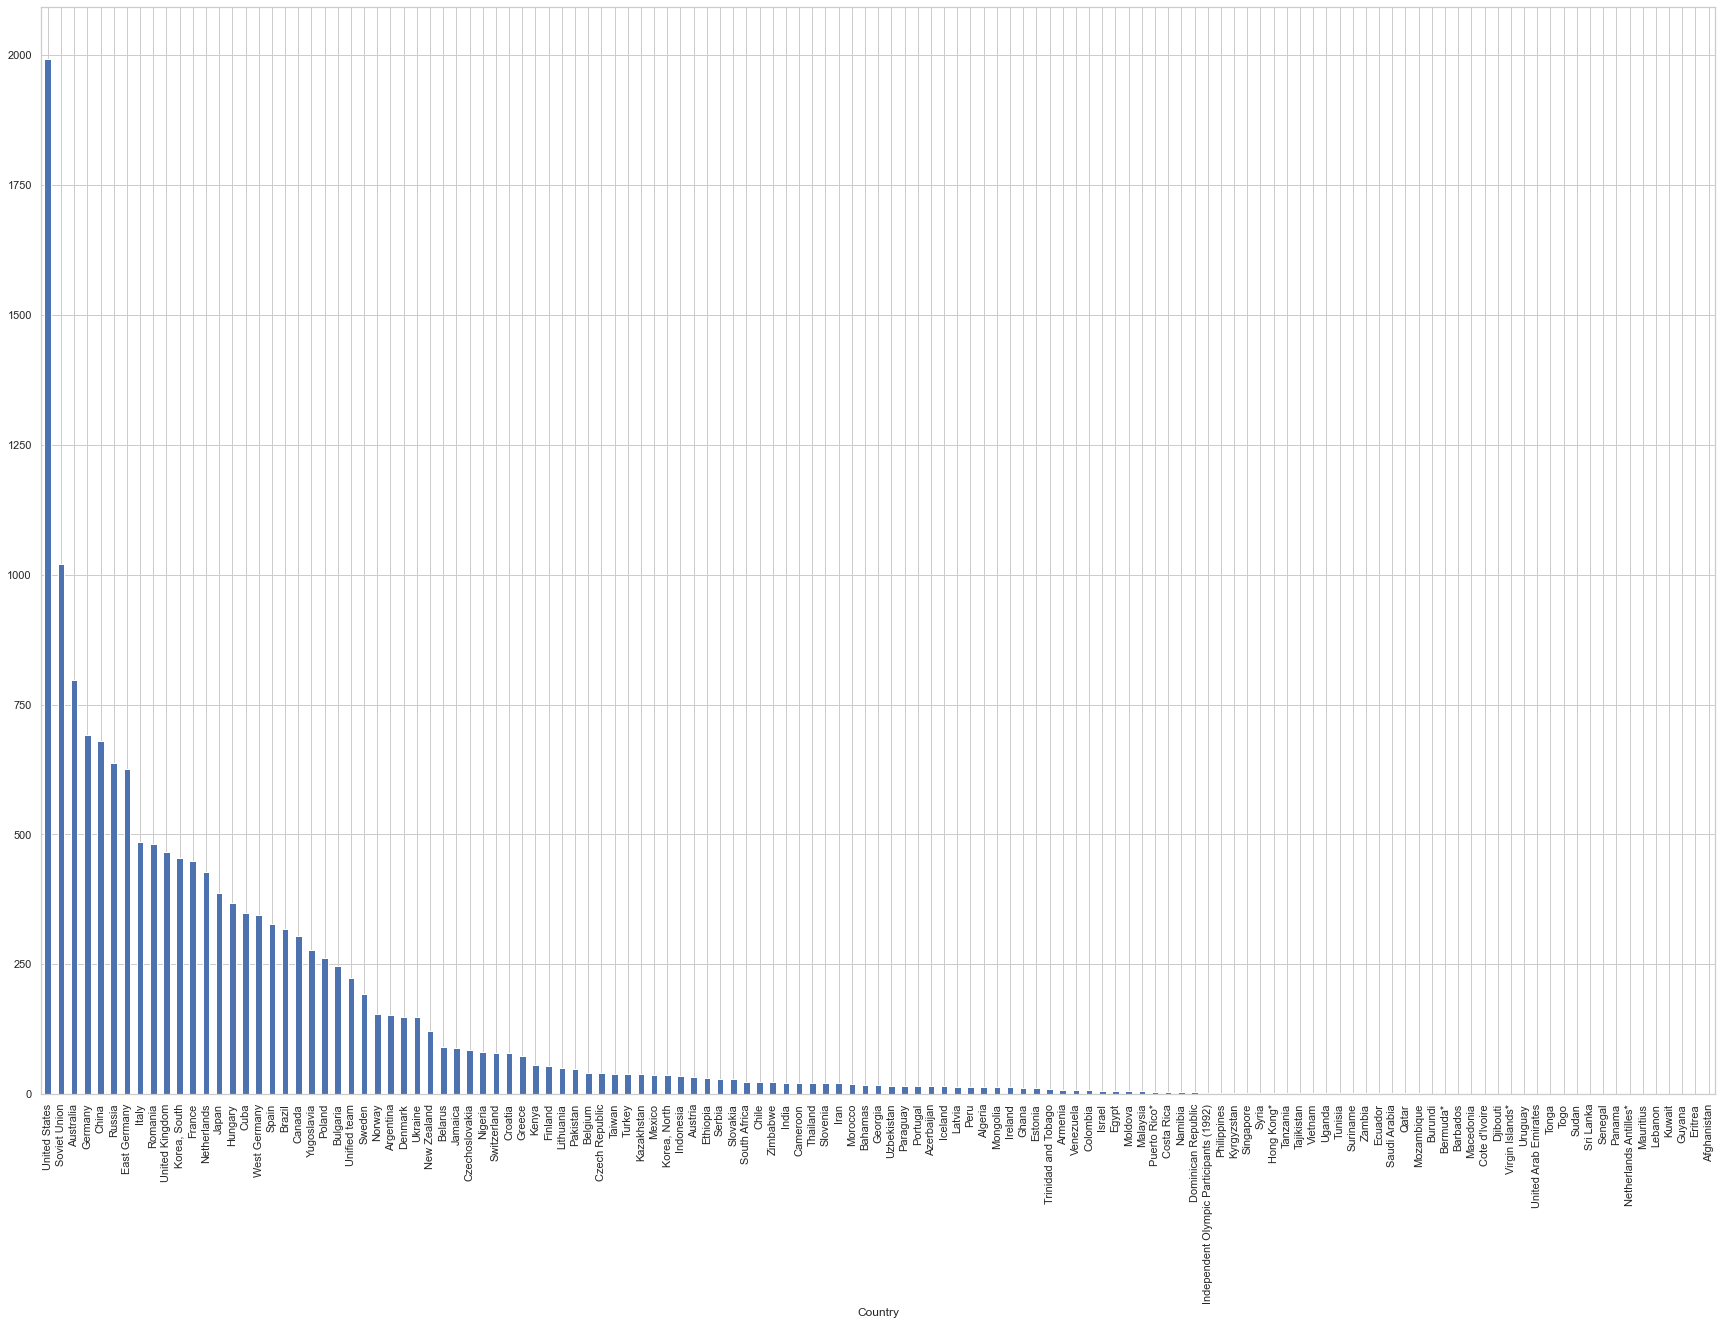

In [123]:
# group by country and count medals for each unique country
#all countries
plt.subplots(figsize=(30, 20))
df.groupby('Country')['Medal'].count().sort_values(ascending = False)
df.groupby('Country')['Medal'].count().sort_values(ascending = False).plot(kind = 'bar')

In [124]:
df.groupby(['Country', 'Gender'])['Medal'].count()

Country       Gender
Afghanistan   Men         1
Algeria       Men        11
              Women       3
Argentina     Men        99
              Women      54
                       ... 
West Germany  Women      79
Yugoslavia    Men       218
              Women      60
Zambia        Men         2
Zimbabwe      Women      23
Name: Medal, Length: 204, dtype: int64

In [125]:
#who have the highest number of medals? (top 20)
#convert the groupby to a dataframe
top20 = pd.DataFrame(df.groupby('Country')['Medal'].count().sort_values(ascending = False)).reset_index()
#delete rows below row 20
#the first 20 rows
top20 = top20.iloc[:20]
top20

,Country,Medal
0,United States,1992
1,Soviet Union,1021
2,Australia,798
3,Germany,691
4,China,679
5,Russia,638
6,East Germany,626
7,Italy,486
8,Romania,482
9,United Kingdom,467


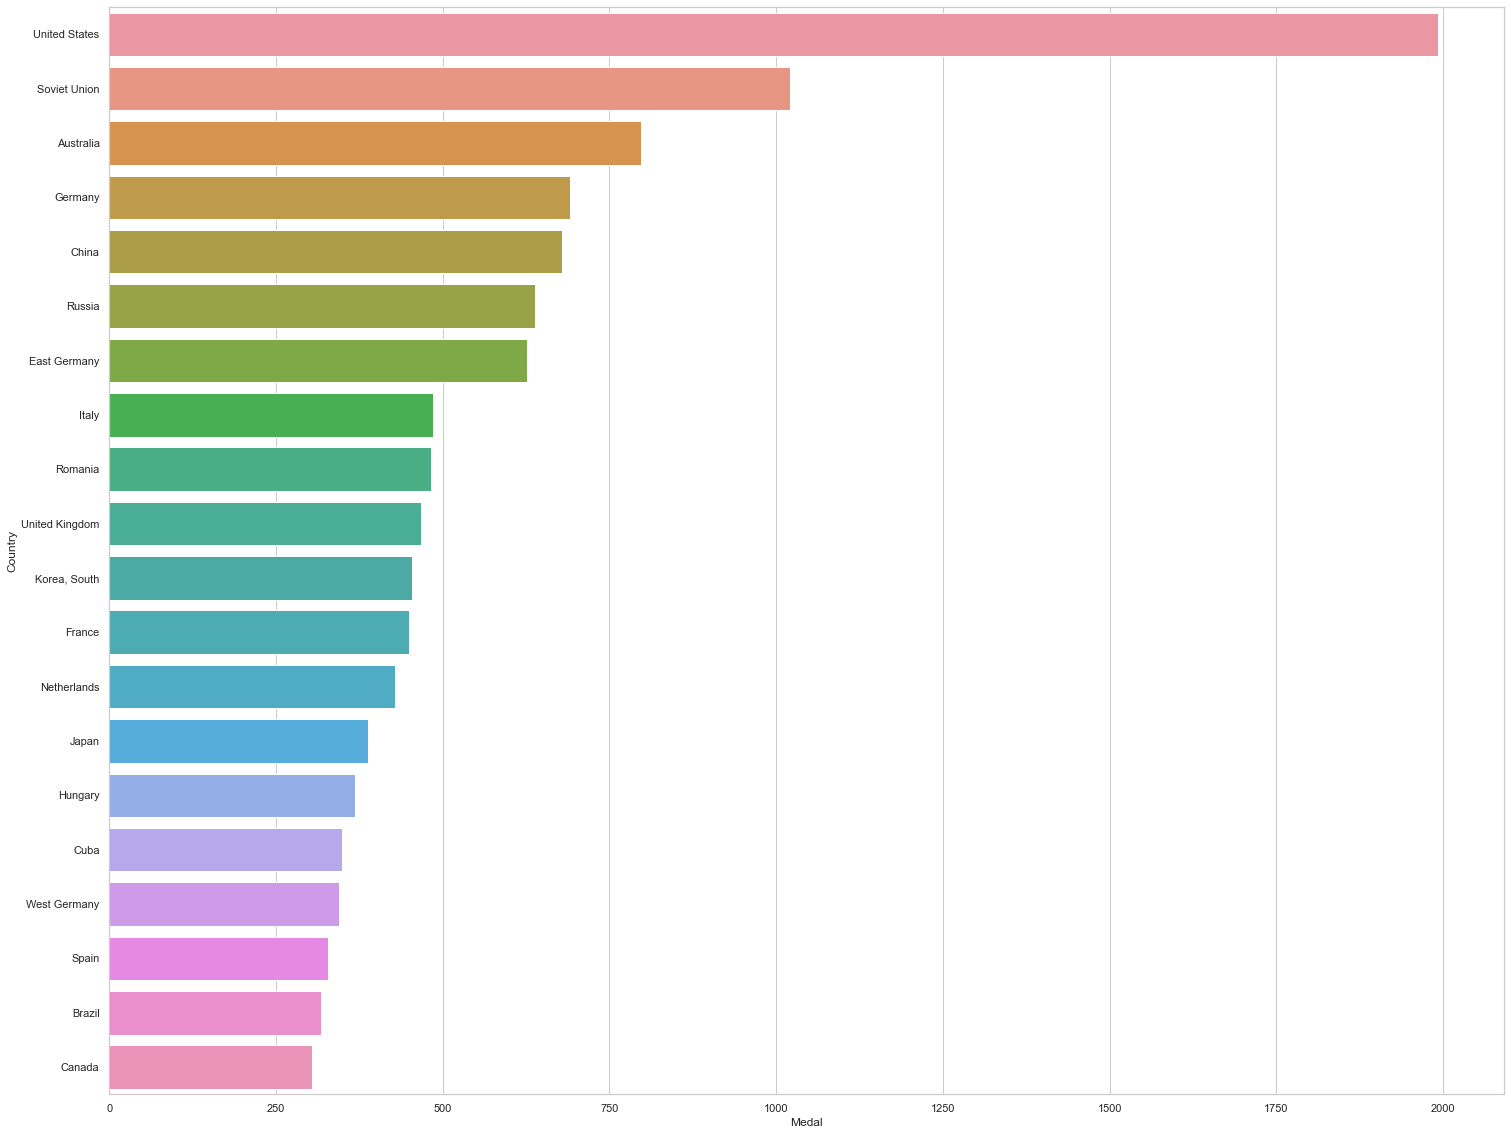

In [126]:
# figsize(width, height)
plt.subplots(figsize=(25, 20))
sns.barplot(x = top20.Medal, y = top20.Country)

## Question 2: Who is the athlete with the highest number of gold medals? (top 10)

In [127]:
df.groupby('Athlete')['Medal'].value_counts()
# df.groupby('Athlete')['Medal'].count()

Athlete                Medal 
AAMODT, Ragnhild       Gold      1
AARDENBURG, Willemien  Bronze    1
AARDEWIJN, Pepijn      Silver    1
AARONES, Ann Kristin   Bronze    1
ABAJO, Jose Luis       Bronze    1
                                ..
ZYKINA, Olesya         Bronze    1
                       Silver    1
ZÜHLKE, Steffen        Bronze    1
ZÜLOW, Andreas         Gold      1
ÖRSTED, Hans-Henrik    Bronze    1
Name: Medal, Length: 13273, dtype: int64

In [128]:
#filter dataframe only gold medalists
gold = df[df.Medal == 'Gold']
gold.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
6,Montreal,1976.0,Aquatics,Diving,10m platform,"VAYTSEKHOVSKAYA, Elena",Women,URS,Soviet Union,W,Gold
8,Montreal,1976.0,Aquatics,Diving,10m platform,"DIBIASI, Klaus",Men,ITA,Italy,M,Gold
11,Montreal,1976.0,Aquatics,Diving,3m springboard,"CHANDLER, Jennifer Kay",Women,USA,United States,W,Gold
12,Montreal,1976.0,Aquatics,Swimming,4x100m freestyle relay,"BABASHOFF, Shirley Farber",Women,USA,United States,W,Gold


In [129]:
#use groupby on the new dataframe and obtain count of golds for each athlete
gold.groupby(['Athlete', 'Country'])['Medal'].count().sort_values(ascending = False)

Athlete                 Country      
PHELPS, Michael         United States    14
LEWIS, Carl             United States     9
BIONDI, Matthew         United States     8
THOMPSON, Jenny         United States     8
OTTO, Kristin           East Germany      6
                                         ..
NOTT, Tara              United States     1
NOTHSTEIN, Marty        United States     1
NORELIUS, Kristine Lee  United States     1
NORDBY, Bente           Norway            1
AAMODT, Ragnhild        Norway            1
Name: Medal, Length: 4061, dtype: int64

In [130]:
#change to a dataframe
gold_df = pd.DataFrame(gold.groupby(['Athlete','Country'])['Medal'].count().sort_values(ascending = False)).reset_index()

In [131]:
#obtain top 10
gold_df = gold_df.iloc[:10]
gold_df

,Athlete,Country,Medal
0,"PHELPS, Michael",United States,14
1,"LEWIS, Carl",United States,9
2,"BIONDI, Matthew",United States,8
3,"THOMPSON, Jenny",United States,8
4,"OTTO, Kristin",East Germany,6
5,"ANDRIANOV, Nikolay",Soviet Union,6
6,"SCHERBO, Vitaly",Unified team,6
7,"VAN DYKEN, Amy",United States,6
8,"KIM, Nelli",Soviet Union,5
9,"COMANECI, Nadia",Romania,5


/Users/liyatilahun/.virtualenvs/ds/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


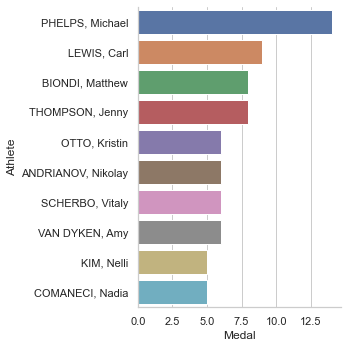

In [132]:
# figsize(width, height)
# plt.subplots(figsize=(20, 10))
# sns.barplot(x = gold_df.Medal, y = gold_df.Athlete)
# sns.set(style="whitegrid")
sns.factorplot(x = 'Medal', y = 'Athlete', data = gold_df, kind = 'bar')

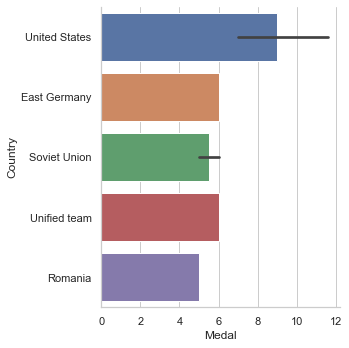

In [133]:
sns.factorplot(x = 'Medal', y = 'Country', data = gold_df, kind = 'bar')

## Question 3: In 2008, which country had the highest number of medals? (top 5)

In [144]:
#drop the Nan value in year
#FILTER YEARS WITH NO NAN VALUES
df = df[df['Year'].notna()]

#Convert year values from float to int
df.Year = df.Year.astype(int)

#new df with datas only yr 2008 
y2008 = df[df.Year == 2008]
y2008.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
13391,Beijing,2008,Aquatics,Diving,3m springboard,"QIN, Kai",Men,CHN,China,M,Bronze
13392,Beijing,2008,Aquatics,Diving,synchronized diving 10m platform,"LIN, Yue",Men,CHN,China,M,Gold
13393,Beijing,2008,Aquatics,Diving,synchronized diving 10m platform,"WU, Melissa",Women,AUS,Australia,W,Silver
13394,Beijing,2008,Aquatics,Diving,synchronized diving 10m platform,"DOBROSKOK, Dmitriy",Men,RUS,Russia,M,Bronze
13395,Beijing,2008,Aquatics,Diving,synchronized diving 3m springboard,"GUO, Jingjing",Women,CHN,China,W,Gold


In [154]:
#use groupby on the new dataframe and obtain count of medals for each country
y08 = pd.DataFrame(y2008.groupby(['Country'])['Medal'].count().sort_values(ascending = False)).reset_index()

#top 5 
y08 = y08.iloc[:5]
y08

,Country,Medal
0,United States,315
1,China,184
2,Australia,149
3,Russia,143
4,Germany,101


([<matplotlib.patches.Wedge at 0x12a6b9a90>,
 [Text(0.48970009669378833, 0.9849841700748773, 'United States'),
  Text(-1.0587533223847845, 0.298398060213502, 'China'),
  Text(-0.6854059844761102, -0.8603595971710517, 'Australia'),
  Text(0.383090350062769, -1.031136161565865, 'Russia'),
  Text(1.0311361884664922, -0.38309027765631803, 'Germany')])

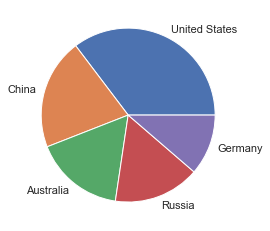

In [165]:
#pie chart
plt.pie(y08['Medal'].values, labels = y08['Country'])

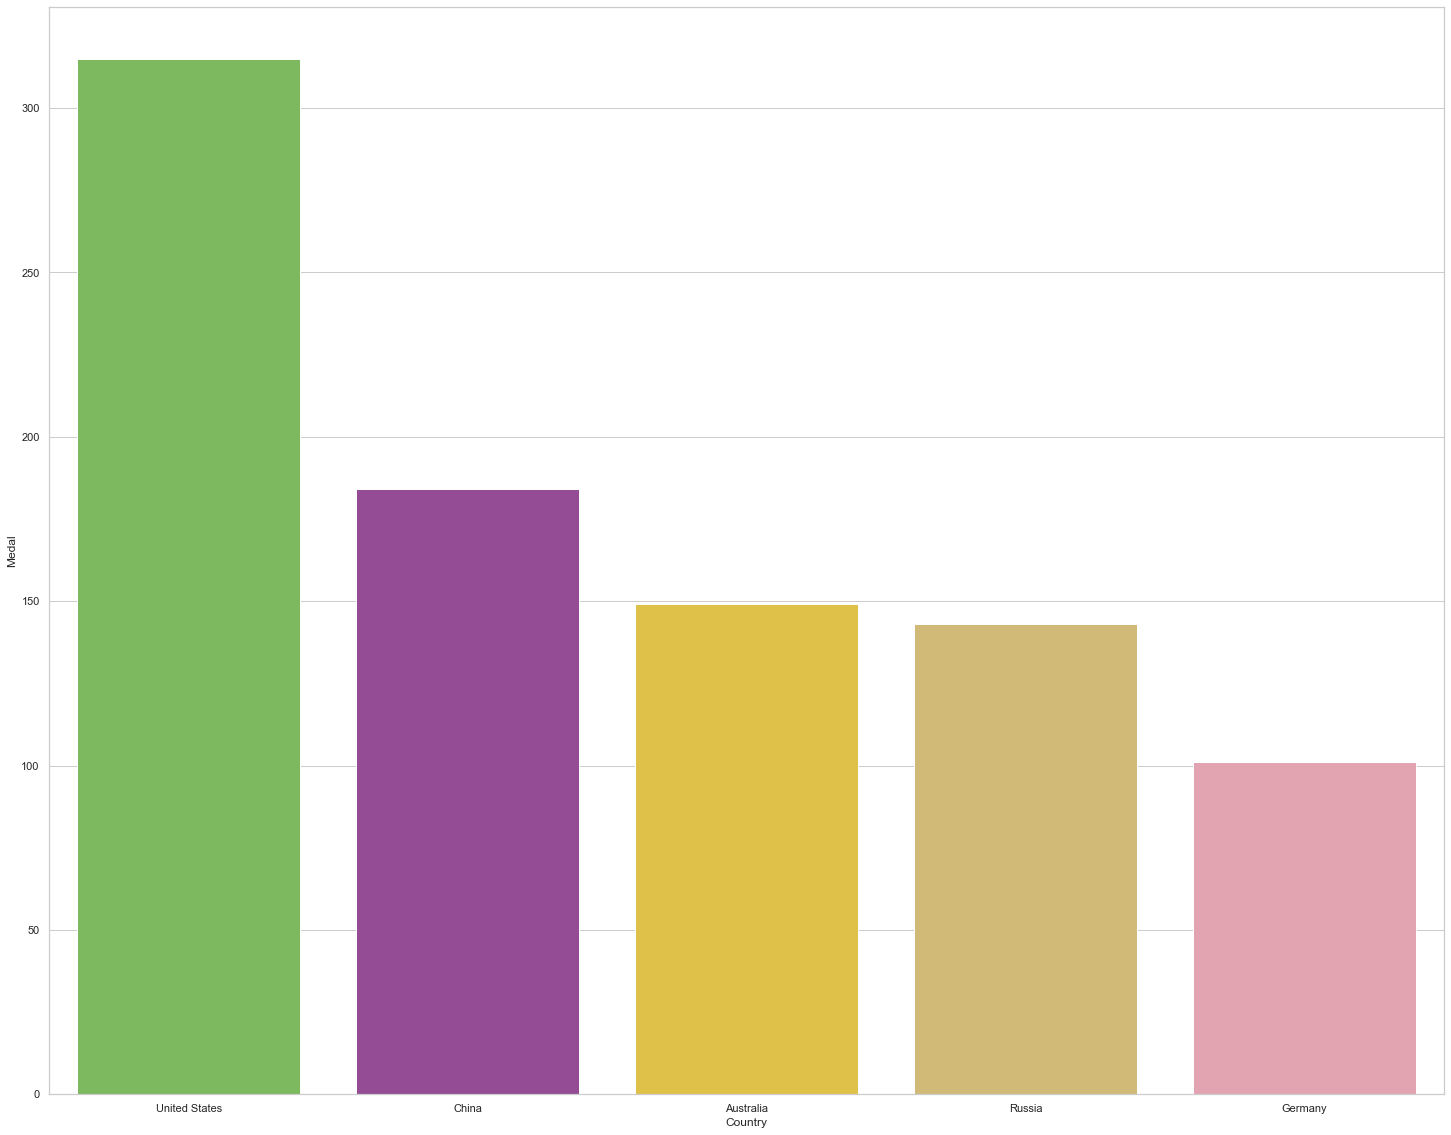

In [172]:
# figsize(width, height)
plt.subplots(figsize=(25, 20))
# Tuning our color palette for the data
palette = ['#78C850',  # Grass
#                     '#F08030',  # Fire
#                     '#6890F0',  # Water
#                     '#A8B820',  # Bug
#                     '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sns.barplot(y = y08.Medal, x = y08.Country, palette = palette)

In [ ]:
#legend 